In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 286MB/s]
100% 1.06G/1.06G [00:04<00:00, 255MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 105ms/step - loss: 1.0511 - accuracy: 0.5289 - val_loss: 0.6721 - val_accuracy: 0.5496
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6600 - accuracy: 0.5894 - val_loss: 0.6100 - val_accuracy: 0.6518
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5800 - accuracy: 0.6898 - val_loss: 0.5447 - val_accuracy: 0.7226
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5033 - accuracy: 0.7547 - val_loss: 0.4948 - val_accuracy: 0.7690
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4366 - accuracy: 0.7988 - val_loss: 0.4779 - val_accuracy: 0.7672
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3734 - accuracy: 0.8340 - val_loss: 0.4619 - val_accuracy: 0.8038
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2947 - accuracy: 0.8762 - val_loss: 0.4350 - val_ac

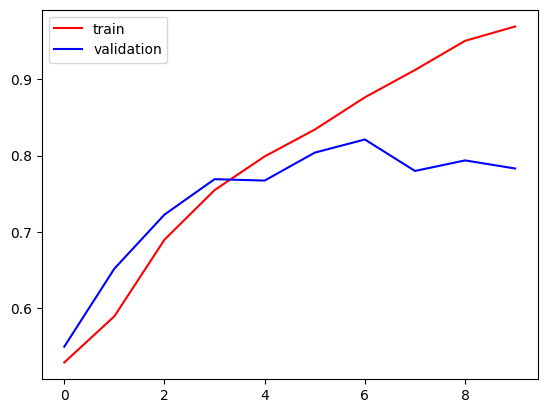

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

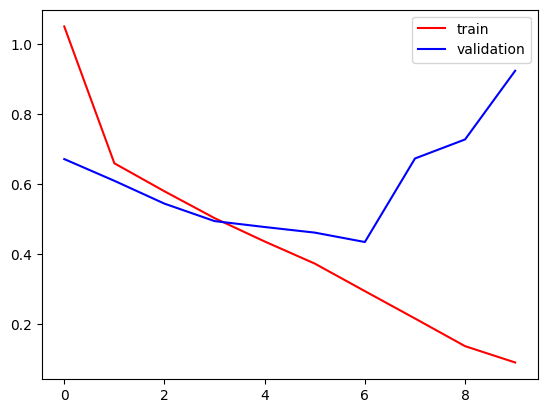

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [18]:
test_img = cv2.imread('/content/dog.jpg')

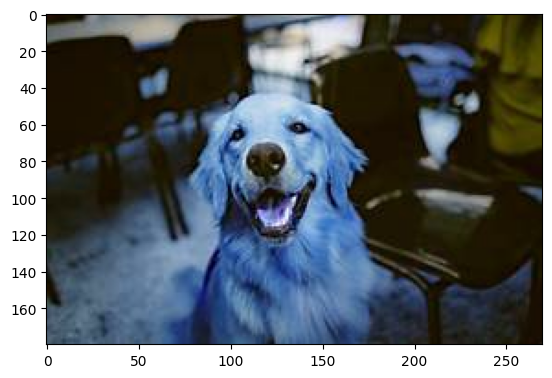

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(180, 270, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 393ms/step


array([[1.]], dtype=float32)

Using Transfer Learning

In [14]:
conv_base = VGG16(
    weights ='imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [16]:
new_model = Sequential()

new_model.add(conv_base)
new_model.add(Flatten())
new_model.add(Dense(256,activation='relu'))
new_model.add(Dense(1,activation='sigmoid'))

In [17]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
conv_base.trainable = False

In [19]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [20]:
# generators
new_train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

new_validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

new_train_ds = new_train_ds.map(process)
new_validation_ds = new_validation_ds.map(process)

In [22]:
new_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
new_history = new_model.fit(new_train_ds,epochs=10,validation_data=new_validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 102ms/step - loss: 0.2787 - accuracy: 0.8830 - val_loss: 0.2072 - val_accuracy: 0.9086
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1949 - accuracy: 0.9179 - val_loss: 0.2041 - val_accuracy: 0.9128
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1661 - accuracy: 0.9305 - val_loss: 0.2062 - val_accuracy: 0.9136
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1372 - accuracy: 0.9445 - val_loss: 0.2122 - val_accuracy: 0.9138
Epoch 5/10
625/625 [==============================] - 54s 87ms/step - loss: 0.1209 - accuracy: 0.9507 - val_loss: 0.2300 - val_accuracy: 0.9146
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0917 - accuracy: 0.9653 - val_loss: 0.2544 - val_accuracy: 0.9128
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0666 - accuracy: 0.9750 - val_loss: 0.2893 - val_accura

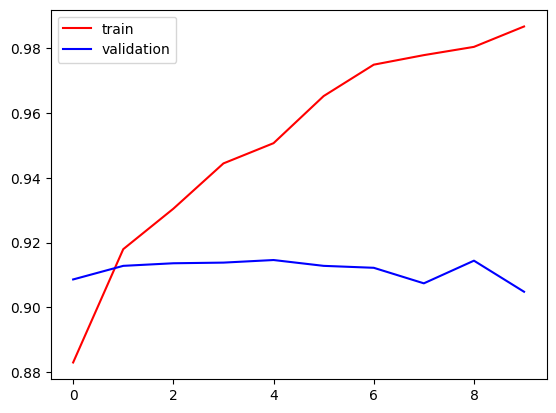

In [27]:
import matplotlib.pyplot as plt

plt.plot(new_history.history['accuracy'],color='red',label='train')
plt.plot(new_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

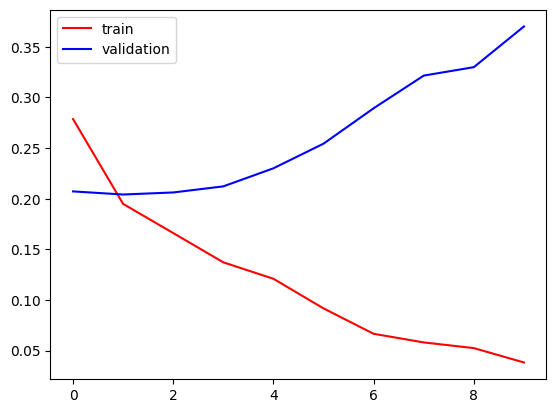

In [28]:
plt.plot(new_history.history['loss'],color='red',label='train')
plt.plot(new_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Using Data Augmentation to treat Overfitting

In [29]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [30]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [31]:
new_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
aug_history = new_model.fit_generator(
    train_generator,
    epochs=10,
    validation_data = validation_generator
)

<ipython-input-32-171f17790fbc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  aug_history = new_model.fit_generator(


Epoch 1/10
625/625 [==============================] - 155s 247ms/step - loss: 0.2177 - accuracy: 0.9145 - val_loss: 0.2138 - val_accuracy: 0.9154
Epoch 2/10
625/625 [==============================] - 163s 261ms/step - loss: 0.1857 - accuracy: 0.9204 - val_loss: 0.2570 - val_accuracy: 0.9052
Epoch 3/10
625/625 [==============================] - 151s 241ms/step - loss: 0.1691 - accuracy: 0.9291 - val_loss: 0.2141 - val_accuracy: 0.9142
Epoch 4/10
625/625 [==============================] - 150s 239ms/step - loss: 0.1630 - accuracy: 0.9319 - val_loss: 0.1965 - val_accuracy: 0.9208
Epoch 5/10
625/625 [==============================] - 150s 239ms/step - loss: 0.1571 - accuracy: 0.9342 - val_loss: 0.2073 - val_accuracy: 0.9216
Epoch 6/10
625/625 [==============================] - 151s 241ms/step - loss: 0.1440 - accuracy: 0.9398 - val_loss: 0.2049 - val_accuracy: 0.9202
Epoch 7/10
625/625 [==============================] - 150s 240ms/step - loss: 0.1425 - accuracy: 0.9408 - val_loss: 0.2388 -

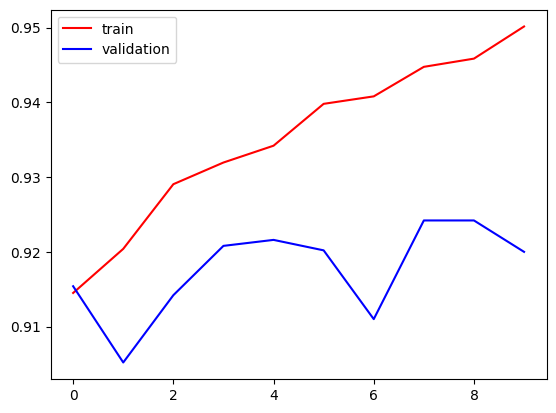

In [35]:
import matplotlib.pyplot as plt

plt.plot(aug_history.history['accuracy'],color='red',label='train')
plt.plot(aug_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

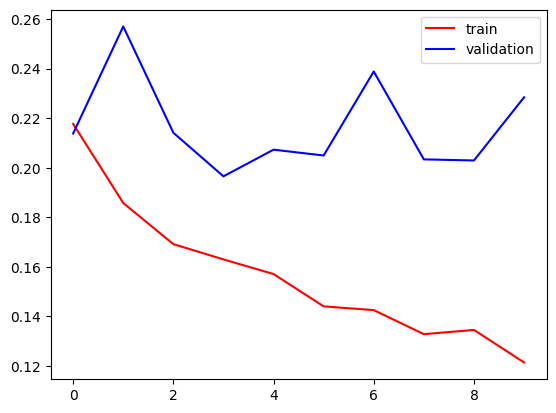

In [36]:
plt.plot(aug_history.history['loss'],color='red',label='train')
plt.plot(aug_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()